In [255]:
import numpy as np
import pandas as pd
import sklearn
import scipy.integrate as spi  
import pylab as pl 

In [256]:
df = pd.read_csv("uci-news-aggregator.csv")

In [257]:
df

ID                                              TITLE  \
0            1  Fed official says weak data caused by weather,...   
1            2  Fed's Charles Plosser sees high bar for change...   
2            3  US open: Stocks fall after Fed official hints ...   
3            4  Fed risks falling 'behind the curve', Charles ...   
4            5  Fed's Plosser: Nasty Weather Has Curbed Job Gr...   
5            6  Plosser: Fed May Have to Accelerate Tapering Pace   
6            7          Fed's Plosser: Taper pace may be too slow   
7            8  Fed's Plosser expects US unemployment to fall ...   
8            9  US jobs growth last month hit by weather:Fed P...   
9           10  ECB unlikely to end sterilisation of SMP purch...   
10          11  ECB unlikely to end sterilization of SMP purch...   
11          12              EU's half-baked bank union could work   
12          13       Europe reaches crunch point on banking union   
13          14  ECB FOCUS-Stronger euro drowns out ECB's messa...   
14          15         EU aims for deal on tackling failing banks   
15          16  Forex - Pound drops to one-month lows against ...   
16          17  Noyer Says Strong Euro Creates Unwarranted Eco...   
17          18  EU Week Ahead March 10-14: Bank Resolution, Tr...   
18          19  ECB member Noyer is 'very open to all kinds of...   
19          20  Euro Anxieties Wane as Bunds Top Treasuries, S...   
20          21  Noyer Says Strong Euro Creates Unwarranted Eco...   
21          22  Noyer Says Stronger Euro Creates Unwarranted P...   
22          23  Bad loan triggers key feature in ECB bank test...   
23          24  China's trade deficit and structural worries i...   
24          25            10 Things You Need To Know This Morning   
25          26  ECB's Noyer not Happy With Euro Strength -- Up...   
26          27   Eurozone banks' sovereign exposure hits new high   
27          28  ECB to reveal bad loan hurdles for euro zone b...   
28          29  Forex Market: EUR/USD retreats from 2-1/2-year...   
29          30  REFILE-Bad loan triggers key feature in ECB ba...   
...        ...                                                ...   
422389  422908  CDC director says Liberia Ebola outbreak to ge...   
422390  422909  France Asks Citizens to Avoid Liberia, Sierra ...   
422391  422910  Ebola-infected doctor in Sierra Leone, Sahr Ro...   
422392  422911  Ebola zone nations isolated as airlines stop f...   
422393  422912  28/08/2014Ebola response 'dangerously inadequa...   
422394  422913  Glaxo's Ebola vaccine may begin safety tests i...   
422395  422914  Ebola causing huge damage to West African econ...   
422396  422915  Ebola outbreak: 'It's even worse than I'd feared'   
422397  422916   CDC: Ebola outbreak 'even worse than I'd feared'   
422398  422917  Ebola Virus Disease in the Democratic Republic...   
422399  422918  CDC Chief Warns Liberia Ebola Crisis 'Will Get...   
422400  422919  UPDATE 3-Ebola causing huge damage to W.Africa...   
422401  422920  WHO removes staff from Sierra Leone Ebola cent...   
422402  422921  Ebola causing huge damage to W Africa economie...   
422403  422922  Democratic Republic of Congo reports Ebola out...   
422404  422923               British Ebola sufferer gets new drug   
422405  422924  AFDB Boss Says Ebola Infected Countries May Lo...   
422406  422925  Cincinnati Children's to rebuild boy's throat ...   
422407  422926  Cincinnati doctors use child's rib to rebuild ...   
422408  422927  Cincinnati Children's surgeons rebuild throat ...   
422409  422928  Surgeons remove 4-year-old's rib to rebuild da...   
422410  422929       Surgery update for boy who swallowed battery   
422411  422930       Boy who swallowed battery headed for surgery   
422412  422931  Ohio Boy's Throat Rebuilt After Being Burned B...   
422413  422932  Cincinnati Children's surgeons to rebuild thro...   
422414  422933  Surgeons to remove 4-year-old's rib to rebuild...   
422415  42

In [258]:
x = df.iloc[:, 1:2].values
x

array([['Fed official says weak data caused by weather, should not slow taper'],
       ["Fed's Charles Plosser sees high bar for change in pace of tapering"],
       ['US open: Stocks fall after Fed official hints at accelerated tapering'],
       ...,
       ['Child who swallowed battery to have reconstructive surgery at Cincinnati  ...'],
       ['Phoenix boy undergoes surgery to repair throat damage - WFSB 3 Connecticut'],
       ['Phoenix boy undergoes surgery to repair throat damage - CBS 3 Springfield  ...']],
      dtype=object)

In [259]:
y = df.iloc[:, 3:5].values
y

array([['Los Angeles Times', 'b'],
       ['Livemint', 'b'],
       ['IFA Magazine', 'b'],
       ...,
       ['NewsNet5.com', 'm'],
       ['WFSB', 'm'],
       ['WSHM-TV', 'm']], dtype=object)

In [260]:
z = df["TIMESTAMP"].values
z = z.reshape((len(z), 1))

In [261]:
r = np.concatenate((x, y), axis = 1)

In [262]:
ans = np.concatenate((r, z), axis = 1)

In [263]:
ans = pd.DataFrame(ans)
ans.columns = ['Title', 'Publisher', 'Category', 'Timestamp'] 

In [264]:
ans

Title  \
0       Fed official says weak data caused by weather,...   
1       Fed's Charles Plosser sees high bar for change...   
2       US open: Stocks fall after Fed official hints ...   
3       Fed risks falling 'behind the curve', Charles ...   
4       Fed's Plosser: Nasty Weather Has Curbed Job Gr...   
5       Plosser: Fed May Have to Accelerate Tapering Pace   
6               Fed's Plosser: Taper pace may be too slow   
7       Fed's Plosser expects US unemployment to fall ...   
8       US jobs growth last month hit by weather:Fed P...   
9       ECB unlikely to end sterilisation of SMP purch...   
10      ECB unlikely to end sterilization of SMP purch...   
11                  EU's half-baked bank union could work   
12           Europe reaches crunch point on banking union   
13      ECB FOCUS-Stronger euro drowns out ECB's messa...   
14             EU aims for deal on tackling failing banks   
15      Forex - Pound drops to one-month lows against ...   
16      Noyer Says Strong Euro Creates Unwarranted Eco...   
17      EU Week Ahead March 10-14: Bank Resolution, Tr...   
18      ECB member Noyer is 'very open to all kinds of...   
19      Euro Anxieties Wane as Bunds Top Treasuries, S...   
20      Noyer Says Strong Euro Creates Unwarranted Eco...   
21      Noyer Says Stronger Euro Creates Unwarranted P...   
22      Bad loan triggers key feature in ECB bank test...   
23      China's trade deficit and structural worries i...   
24                10 Things You Need To Know This Morning   
25      ECB's Noyer not Happy With Euro Strength -- Up...   
26       Eurozone banks' sovereign exposure hits new high   
27      ECB to reveal bad loan hurdles for euro zone b...   
28      Forex Market: EUR/USD retreats from 2-1/2-year...   
29      REFILE-Bad loan triggers key feature in ECB ba...   
...                                                   ...   
422389  CDC director says Liberia Ebola outbreak to ge...   
422390  France Asks Citizens to Avoid Liberia, Sierra ...   
422391  Ebola-infected doctor in Sierra Leone, Sahr Ro...   
422392  Ebola zone nations isolated as airlines stop f...   
422393  28/08/2014Ebola response 'dangerously inadequa...   
422394  Glaxo's Ebola vaccine may begin safety tests i...   
422395  Ebola causing huge damage to West African econ...   
422396  Ebola outbreak: 'It's even worse than I'd feared'   
422397   CDC: Ebola outbreak 'even worse than I'd feared'   
422398  Ebola Virus Disease in the Democratic Republic...   
422399  CDC Chief Warns Liberia Ebola Crisis 'Will Get...   
422400  UPDATE 3-Ebola causing huge damage to W.Africa...   
422401  WHO removes staff from Sierra Leone Ebola cent...   
422402  Ebola causing huge damage to W Africa economie...   
422403  Democratic Republic of Congo reports Ebola out...   
422404               British Ebola sufferer gets new drug   
422405  AFDB Boss Says Ebola Infected Countries May Lo...   
422406  Cincinnati Children's to rebuild boy's throat ...   
422407  Cincinnati doctors use child's rib to rebuild ...   
422408  Cincinnati Children's surgeons rebuild throat ...   
422409  Surgeons remove 4-year-old's rib to rebuild da...   
422410       Surgery update for boy who swallowed battery   
422411       Boy who swallowed battery headed for surgery   
422412  Ohio Boy's Throat Rebuilt After Being Burned B...   
422413  Cincinnati Children's surgeons to rebuild thro...   
422414  Surgeons to remove 4-year-old's rib to rebuild...   
422415  Boy to have surgery on esophagus after battery...   
422416  Child who swallowed battery to have reconstruc...   
422417  Phoenix boy undergoes surgery to repair throat...   
422418  Phoenix boy undergoes surgery to repair throat...   

                           Publisher Category      Timestamp  
0                  Los Angeles Times        b  1394470370698  
1                           Livemint        b  1394470371207  
2                       IFA Magazine        b  1394470371550  
3                

In [265]:
l1 = []
l2 = []
l3 = []
l4 = []
for i in range(ans.shape[0]):
    if(ans['Category'][i] == 'b'):
        l1.append(ans.iloc[i, :].values)
    elif(ans['Category'][i] == 't'):
        l2.append(ans.iloc[i, :].values)
    elif(ans['Category'][i] == 'e'):
        l3.append(ans.iloc[i, :].values)
    else:
        l4.append(ans.iloc[i, :].values)

In [266]:
l1

[array(['Fed official says weak data caused by weather, should not slow taper',
        'Los Angeles Times', 'b', 1394470370698], dtype=object),
 array(["Fed's Charles Plosser sees high bar for change in pace of tapering",
        'Livemint', 'b', 1394470371207], dtype=object),
 array(['US open: Stocks fall after Fed official hints at accelerated tapering',
        'IFA Magazine', 'b', 1394470371550], dtype=object),
 array(["Fed risks falling 'behind the curve', Charles Plosser says",
        'IFA Magazine', 'b', 1394470371793], dtype=object),
 array(["Fed's Plosser: Nasty Weather Has Curbed Job Growth", 'Moneynews',
        'b', 1394470372027], dtype=object),
 array(['Plosser: Fed May Have to Accelerate Tapering Pace', 'NASDAQ', 'b',
        1394470372212], dtype=object),
 array(["Fed's Plosser: Taper pace may be too slow", 'MarketWatch', 'b',
        1394470372405], dtype=object),
 array(["Fed's Plosser expects US unemployment to fall to 6.2% by the end of 2014",
        'FXstreet.co

In [267]:
l2

[array(['Titanfall Review Roundup', 'GameSpot', 't', 1394493709803],
       dtype=object),
 array(['Titanfall review: my buddy', 'Polygon', 't', 1394493709980],
       dtype=object),
 array(["Respawn: Titanfall's server stability is in Microsoft's azure hands",
        'Joystiq', 't', 1394493710180], dtype=object),
 array(["Titanfall's Resolution 'Likely' to be Increased With Patch",
        'TechnoBuffalo', 't', 1394493710348], dtype=object),
 array(['Xbox One Titanfall Bundle Release Date Tomorrow: Pre-Order Price at  ...',
        'Gospel Herald', 't', 1394493710552], dtype=object),
 array(['Titanfall\'s Xbox One Resolution "Likely to Increase" After Launch',
        'NZGamer.com', 't', 1394493710753], dtype=object),
 array(["'Titanfall' Live-Action Adaptation in Development; Trailer Release Date Revealed",
        'Game Rant', 't', 1394493710979], dtype=object),
 array(['Titanfall Fans In South Africa Ask EA To Let Them Play',
        'The Escapist', 't', 1394493711131], dtype=obje

In [268]:
l3

[array(['George Zimmerman Has an Armed Life on the Move', 'WLTX.com', 'e',
        1394517154092], dtype=object),
 array(['George Zimmerman Signs Autographs At Florida Gun Show',
        'Huffington Post UK', 'e', 1394517154269], dtype=object),
 array(['George Zimmerman Signed Autographs at an Orlando Gun Show — But Only 20  ...',
        'BlackNews.com \\(press release\\)', 'e', 1394517154479],
       dtype=object),
 array(['George Zimmerman back in controversy', 'WTXL ABC 27', 'e',
        1394517154639], dtype=object),
 array(['George Zimmerman signs autographs at a Florida gun show', 'MSNBC',
        'e', 1394517154831], dtype=object),
 array(['George Zimmerman Signs Autographs At Gun Show', 'WebProNews', 'e',
        1394517155000], dtype=object),
 array(['George Zimmerman Fails To Cash In On Murder as Few Show Up To Meet Him  ...',
        'PoliticusUSA', 'e', 1394517155201], dtype=object),
 array(['Homeless Zimmerman Signs Autographs at Gun Show', 'Newsmax.com',
        'e', 139

In [269]:
l4

[array(['Grown-ups: Put down the smartphones at mealtime', 'KETK', 'm',
        1394547690684], dtype=object),
 array(['Cellphone addiction may damage parent-child bond: Study', 'NDTV',
        'm', 1394547690827], dtype=object),
 array(["Parents won't stop using smartphones even while eating with kids",
        'Mother Nature Network', 'm', 1394547691052], dtype=object),
 array(['Smartphones making parents ignore their kids', 'Times of India',
        'm', 1394547691288], dtype=object),
 array(['Smartphones can loosen emotional bonding with your children: Study',
        "The Utah People's Post", 'm', 1394547691482], dtype=object),
 array(['Parents Distracted By Smartphones Ignore Their Kids',
        'Physicians News Digest', 'm', 1394547691650], dtype=object),
 array(['Smartphones may threaten parent-child emotional bond',
        'Economic Times', 'm', 1394547691868], dtype=object),
 array(['Cell phone addiction may kill parent-child bond', 'gulfnews.com',
        'm', 139454769210

In [270]:
l1 = np.array(l1).reshape((len(l1), 4))
l2 = np.array(l2).reshape((len(l2), 4))
l3 = np.array(l3).reshape((len(l3), 4))
l4 = np.array(l4).reshape((len(l4), 4))

In [271]:
l1

array([['Fed official says weak data caused by weather, should not slow taper',
        'Los Angeles Times', 'b', 1394470370698],
       ["Fed's Charles Plosser sees high bar for change in pace of tapering",
        'Livemint', 'b', 1394470371207],
       ['US open: Stocks fall after Fed official hints at accelerated tapering',
        'IFA Magazine', 'b', 1394470371550],
       ...,
       ["Jessica Alba is General Catalyst's newest billion-dollar entrepreneur",
        'BetaBoston', 'b', 1409200542439],
       ["Jessica Alba's The Honest Company raises $70M", 'VatorNews',
        'b', 1409200543103],
       ['Jessica Alba startup The Honest Co. raises $70 million as it heads toward IPO',
        'Fortune', 'b', 1409200543846]], dtype=object)

In [272]:
l2

array([['Titanfall Review Roundup', 'GameSpot', 't', 1394493709803],
       ['Titanfall review: my buddy', 'Polygon', 't', 1394493709980],
       ["Respawn: Titanfall's server stability is in Microsoft's azure hands",
        'Joystiq', 't', 1394493710180],
       ...,
       ['For many, the once-hyped tablet has become dead weight',
        'TwinCities.com-Pioneer Press', 't', 1409209598277],
       ["iPad Air 2 and iPad Mini 3 Release Date, Price & Specs Rumors: Apple's Latest  ...",
        'Latin Post', 't', 1409209598627],
       ["Can the iPad Air 2 Bring Apple, Inc.'s Tablet Business Back?",
        'Motley Fool', 't', 1409209598837]], dtype=object)

In [273]:
l3

array([['George Zimmerman Has an Armed Life on the Move', 'WLTX.com',
        'e', 1394517154092],
       ['George Zimmerman Signs Autographs At Florida Gun Show',
        'Huffington Post UK', 'e', 1394517154269],
       ['George Zimmerman Signed Autographs at an Orlando Gun Show — But Only 20  ...',
        'BlackNews.com \\(press release\\)', 'e', 1394517154479],
       ...,
       ['Justin Bieber nearly crashes into an old woman', 'Firstpost',
        'e', 1409223843632],
       ['Justin Bieber has been warned by police not to drive his Can-Am Spyder on the  ...',
        'NZ City', 'e', 1409223843870],
       ['Selena Gomez Shows Off New Weave, Sexy Maxi',
        'Entertainment Tonight', 'e', 1409223844103]], dtype=object)

In [274]:
l4

array([['Grown-ups: Put down the smartphones at mealtime', 'KETK', 'm',
        1394547690684],
       ['Cellphone addiction may damage parent-child bond: Study',
        'NDTV', 'm', 1394547690827],
       ["Parents won't stop using smartphones even while eating with kids",
        'Mother Nature Network', 'm', 1394547691052],
       ...,
       ['Child who swallowed battery to have reconstructive surgery at Cincinnati  ...',
        'NewsNet5.com', 'm', 1409229190771],
       ['Phoenix boy undergoes surgery to repair throat damage - WFSB 3 Connecticut',
        'WFSB', 'm', 1409229191071],
       ['Phoenix boy undergoes surgery to repair throat damage - CBS 3 Springfield  ...',
        'WSHM-TV', 'm', 1409229191565]], dtype=object)

In [275]:
t1=l1[0]
x1=t1[3]
for tup in l1:
    tup[3] = tup[3]-x1

In [276]:
t2=l2[0]
x2=t2[3]
for tup in l2:
    tup[3] = tup[3]-x2

In [277]:
t3=l3[0]
x3=t3[3]
for tup in l3:
    tup[3] = tup[3]-x3

In [278]:
t4=l4[0]
x4=t4[3]
for tup in l4:
    tup[3] = tup[3]-x4

In [279]:
l1

array([['Fed official says weak data caused by weather, should not slow taper',
        'Los Angeles Times', 'b', 0],
       ["Fed's Charles Plosser sees high bar for change in pace of tapering",
        'Livemint', 'b', 509],
       ['US open: Stocks fall after Fed official hints at accelerated tapering',
        'IFA Magazine', 'b', 852],
       ...,
       ["Jessica Alba is General Catalyst's newest billion-dollar entrepreneur",
        'BetaBoston', 'b', 14730171741],
       ["Jessica Alba's The Honest Company raises $70M", 'VatorNews',
        'b', 14730172405],
       ['Jessica Alba startup The Honest Co. raises $70 million as it heads toward IPO',
        'Fortune', 'b', 14730173148]], dtype=object)

In [280]:
l2

array([['Titanfall Review Roundup', 'GameSpot', 't', 0],
       ['Titanfall review: my buddy', 'Polygon', 't', 177],
       ["Respawn: Titanfall's server stability is in Microsoft's azure hands",
        'Joystiq', 't', 377],
       ...,
       ['For many, the once-hyped tablet has become dead weight',
        'TwinCities.com-Pioneer Press', 't', 14715888474],
       ["iPad Air 2 and iPad Mini 3 Release Date, Price & Specs Rumors: Apple's Latest  ...",
        'Latin Post', 't', 14715888824],
       ["Can the iPad Air 2 Bring Apple, Inc.'s Tablet Business Back?",
        'Motley Fool', 't', 14715889034]], dtype=object)

In [281]:
l3

array([['George Zimmerman Has an Armed Life on the Move', 'WLTX.com',
        'e', 0],
       ['George Zimmerman Signs Autographs At Florida Gun Show',
        'Huffington Post UK', 'e', 177],
       ['George Zimmerman Signed Autographs at an Orlando Gun Show — But Only 20  ...',
        'BlackNews.com \\(press release\\)', 'e', 387],
       ...,
       ['Justin Bieber nearly crashes into an old woman', 'Firstpost',
        'e', 14706689540],
       ['Justin Bieber has been warned by police not to drive his Can-Am Spyder on the  ...',
        'NZ City', 'e', 14706689778],
       ['Selena Gomez Shows Off New Weave, Sexy Maxi',
        'Entertainment Tonight', 'e', 14706690011]], dtype=object)

In [282]:
l4

array([['Grown-ups: Put down the smartphones at mealtime', 'KETK', 'm',
        0],
       ['Cellphone addiction may damage parent-child bond: Study',
        'NDTV', 'm', 143],
       ["Parents won't stop using smartphones even while eating with kids",
        'Mother Nature Network', 'm', 368],
       ...,
       ['Child who swallowed battery to have reconstructive surgery at Cincinnati  ...',
        'NewsNet5.com', 'm', 14681500087],
       ['Phoenix boy undergoes surgery to repair throat damage - WFSB 3 Connecticut',
        'WFSB', 'm', 14681500387],
       ['Phoenix boy undergoes surgery to repair throat damage - CBS 3 Springfield  ...',
        'WSHM-TV', 'm', 14681500881]], dtype=object)

In [430]:
l1 = pd.DataFrame(l1)
l2 = pd.DataFrame(l2)
l3 = pd.DataFrame(l3)
l4 = pd.DataFrame(l4)

In [284]:
l1

0  \
0       Fed official says weak data caused by weather,...   
1       Fed's Charles Plosser sees high bar for change...   
2       US open: Stocks fall after Fed official hints ...   
3       Fed risks falling 'behind the curve', Charles ...   
4       Fed's Plosser: Nasty Weather Has Curbed Job Gr...   
5       Plosser: Fed May Have to Accelerate Tapering Pace   
6               Fed's Plosser: Taper pace may be too slow   
7       Fed's Plosser expects US unemployment to fall ...   
8       US jobs growth last month hit by weather:Fed P...   
9       ECB unlikely to end sterilisation of SMP purch...   
10      ECB unlikely to end sterilization of SMP purch...   
11                  EU's half-baked bank union could work   
12           Europe reaches crunch point on banking union   
13      ECB FOCUS-Stronger euro drowns out ECB's messa...   
14             EU aims for deal on tackling failing banks   
15      Forex - Pound drops to one-month lows against ...   
16      Noyer Says Strong Euro Creates Unwarranted Eco...   
17      EU Week Ahead March 10-14: Bank Resolution, Tr...   
18      ECB member Noyer is 'very open to all kinds of...   
19      Euro Anxieties Wane as Bunds Top Treasuries, S...   
20      Noyer Says Strong Euro Creates Unwarranted Eco...   
21      Noyer Says Stronger Euro Creates Unwarranted P...   
22      Bad loan triggers key feature in ECB bank test...   
23      China's trade deficit and structural worries i...   
24                10 Things You Need To Know This Morning   
25      ECB's Noyer not Happy With Euro Strength -- Up...   
26       Eurozone banks' sovereign exposure hits new high   
27      ECB to reveal bad loan hurdles for euro zone b...   
28      Forex Market: EUR/USD retreats from 2-1/2-year...   
29      REFILE-Bad loan triggers key feature in ECB ba...   
...                                                   ...   
115937  Jessica Alba - Jessica Alba's The Honest Compa...   
115938     Jessica Alba set to be a $1billion nappy mogul   
115939  The Honest Co. raises $70 million with nearly ...   
115940  Dot Com redux: Billion dollar IPO expected for...   
115941  Jessica Alba's Honest Co. valued at just short...   
115942  Honest Co., Jessica Alba's E-Commerce Startup,...   
115943                                 Jessica Alba, Inc.   
115944  Jessica Alba's Startup Raises $70 Million At A...   
115945  Jessica Alba's Honest Company Now Valued at $1...   
115946  Jessica Alba's Honest Co. valued at almost $1 ...   
115947  Jessica Alba's The Honest Company is Worth How...   
115948  Jessica Alba's Honest Company Is Worth Nearly ...   
115949  Jessica Alba's baby products startup Honest Co...   
115950  'Sin City: A Dame To Kill For' Actress Jessica...   
115951  Jessica Alba's The Honest Co. Valued at $1 Bil...   
115952  The Honest Co: How is this organic baby produc...   
115953       Jessica Alba's Honest Co. raises $70-million   
115954  Jessica Alba's Startup Valued at Almost $1 Bil...   
115955         The Honest Company Says It Has Raised $70M   
115956  Jessica Alba's Honest Co. Raises $70 Million t...   
115957  Honest Co. hauls in $70 million from investors...   
115958   Jessica Alba's Honest Company Raises $70 Million   
115959  Jessica Alba's The Honest Co. Raises $70M From...   
115960  Jessica Alba Has a Startup and It's Valued at ...   
115961  UPDATE - Cooley Advises The Honest Company on ...   
115962  Cooley Advises The Honest Company on $70 Milli...   
115963  Jessica Alba's Honest Co. Gets $70 Million in ...   
115964  Jessica Alba is General Catalyst's newest bill...   
115965      Jessica Alba's The Honest Company raises $70M   
115966  Jessica Alba startup The Honest Co. raises $70...   

                                   1  2            3  
0                  Los Angeles Times  b            0  
1                           Livemint  b          509  
2                       IFA Magazine  b          852  
3                       IFA Magazine  b         1095 

In [285]:
l2

0  \
0                                Titanfall Review Roundup   
1                              Titanfall review: my buddy   
2       Respawn: Titanfall's server stability is in Mi...   
3       Titanfall's Resolution 'Likely' to be Increase...   
4       Xbox One Titanfall Bundle Release Date Tomorro...   
5       Titanfall's Xbox One Resolution "Likely to Inc...   
6       'Titanfall' Live-Action Adaptation in Developm...   
7       Titanfall Fans In South Africa Ask EA To Let T...   
8       Titanfall on Xbox One 'likely' to get resoluti...   
9       'Titanfall' launches Tuesday, Microsoft hopes ...   
10      Xbox One 'Titanfall' Bundle and UK Price Drop ...   
11                Titanfall To Launch At 792p on Xbox One   
12      Xbox One May Still Get 1080p Titanfall In Post...   
13      Microsoft: Titanfall could be a "game changer"...   
14      Titanfall Midnight Release Locations: Gamestop...   
15      Titanfall runs at 792p resolution on Xbox One ...   
16      Titanfall Xbox One Launch: Microsoft Releases ...   
17      Titanfall launching at 792p for Xbox One, reso...   
18         Titanfall Will Increase Resolution Post Launch   
19      Titanfall ships at 792p on Xbox One, post-rele...   
20            Titanfall wallpapers for your Windows Phone   
21      Standby for Titanfall: We Talk With Respawn CE...   
22      Microsoft Xbox One Titanfall Another Non-1080p...   
23      Microsoft's Walt Whitman store girds for Titan...   
24      Toys R Us Is Offering 50% Off A Game With Purc...   
25      Titanfall Is Officially 792p On Xbox One, Not ...   
26                           Titanfall review in progress   
27      Titanfall takes aim at the cloud: 'We've reall...   
28      Titanfall: Xbox One resolution confirmed to be...   
29      Gamers get their hands on long-awaited 'Titanf...   
...                                                   ...   
108314  Apple's rumoured 12.9-inch iPad could enter pr...   
108315        Apple planning bigger iPad for 2015: Report   
108316  Apple Thinks You Want An Even Larger 12.9-Inch...   
108317  iPad Air 2 Manufacturing Said To Be Already Un...   
108318             Is tablet lull temporary or permanent?   
108319  Apple Reportedly Beginning Production of 12.9-...   
108320    Tim Cook: iPad sales slump is just a speed bump   
108321  Apple said to start building bigger iPads in e...   
108322           Apple To Launch Biggest-Ever iPad Screen   
108323  iPad with 12.9-inch display rumored to in the ...   
108324  Bloomberg: Apple is reportedly preparing a 12....   
108325      Apple Prepping 12.9-Inch iPad, Says Bloomberg   
108326  Rumor: Apple's jumbo-sized 12.9-inch iPad in t...   
108327  Apple preparing new 12.9-inch iPad for early 2...   
108328                              In Defense of Tablets   
108329  What Can Apple, Inc. Do to Boost Slumping iPad...   
108330  More evidence iPad sales are falling: Best Buy...   
108331    10 credible iPhone 6 details we heard this week   
108332  New iPad Mini 3 and iPad Air 2 release date po...   
108333  Apple iPad Air 2: Rumored Specs, New Leaked Co...   
108334  Steve Jobs on Sports Illustrated's iPad-like D...   
108335  iPad Air 2 release date, latest news plus othe...   
108336  Call it reinvented, minimal, petite or contemp...   
108337  Data Point: School Is Back and So Are Tablet S...   
108338  Apple to maintain its iPad line, despite falli...   
108339  iPad Air 2 And iPad Mini 3 Release Date, Specs...   
108340     Apple rumored to launch its new iPad this fall   
108341  For many, the once-hyped tablet has become dea...   
108342  iPad Air 2 and iPad Mini 3 Release Date, Price...   
108343  Can the iPad Air 2 Bring Apple, Inc.'s Tablet ...   

                                   1  2            3  
0                           GameSpot  t            0  
1                            Polygon  t          177  
2                            Joystiq  t          377  
3                      TechnoBuffalo  t          545 

In [286]:
l3

0  \
0          George Zimmerman Has an Armed Life on the Move   
1       George Zimmerman Signs Autographs At Florida G...   
2       George Zimmerman Signed Autographs at an Orlan...   
3                    George Zimmerman back in controversy   
4       George Zimmerman signs autographs at a Florida...   
5           George Zimmerman Signs Autographs At Gun Show   
6       George Zimmerman Fails To Cash In On Murder as...   
7         Homeless Zimmerman Signs Autographs at Gun Show   
8              George Zimmerman Fails to Kill at Gun Show   
9       George Zimmerman Was the Special Guest at a Gu...   
10      George Zimmerman Was the Guest of Honor at a F...   
11      George Zimmerman fails to make 'a killing' at ...   
12      This Image of George Zimmerman Signing Autogra...   
13      George Zimmerman signs autographs at Orlando g...   
14      Gun show switches venues after George Zimmerma...   
15      Zimmerman Signed Autographs at a Florida Gun Show   
16      The World Is Getting It Wrong! George Zimmerma...   
17      George Zimmerman Signed Autographs At Florida ...   
18                    George Zimmerman's bloody autograph   
19      George Zimmerman signs autographs, poses for p...   
20      George Zimmerman Signs Autographs at Gun Show ...   
21      'Celebrity' Zimmerman signs autographs at gun ...   
22      George Zimmerman Was The Special Guest At A Fl...   
23      George Zimmerman Signs Autographs At Gun Show,...   
24      Disgraceful: Zimmerman Signs Autographs at Gun...   
25       See What George Zimmerman Is Doing For Money Now   
26      George Zimmerman signs fan autographs as 'gues...   
27      George Zimmerman Was the Celebrity Guest at a ...   
28      George Zimmerman Was the "Guest of Honor" at a...   
29                 Zimmerman signs autographs at gun show   
...                                                   ...   
152439  Justin Bieber May Have Finally Reached Rock Bo...   
152440  Justin Bieber Picked A Fight At A Dave & Buster's   
152441  What is Dave & Busters, and why would Justin B...   
152442  Justin Bieber Under Investigation For Attempte...   
152443   Justin Bieber investigated for theft and battery   
152444  Justin Bieber Reportedly 'Lunged' at Fan Takin...   
152445  Justin Bieber out of control at arcade with Se...   
152446  Report: Justin Bieber being investigated for A...   
152447   Bieber Under Investigation for Attempted Robbery   
152448  Justin Bieber and Selena Gomez Dave & Buster's...   
152449   Justin Bieber investigated for attempted robbery   
152450  Justin Bieber And Selena Gomez: Police Called ...   
152451  Justin Bieber in hot water again, under invest...   
152452                  Justin Bieber Has Brush With Cops   
152453  Police interrupt Justin Bieber and Selena Gome...   
152454  Bieber investigated for attempted robbery and ...   
152455  Bieber Allegedly Slaps A Girl While On A Date ...   
152456   Police called to deal with Justin Bieber...again   
152457  Justin Bieber Police Investigation Serious? Se...   
152458  Justin Bieber could land himself in jail as he...   
152459  Justin Bieber cellphone incident prompts LAPD ...   
152460  Justin Bieber cell phone incident at Los Angel...   
152461  Selena Gomez has been seen looking really styl...   
152462  Justin Bieber and Selena Gomez's messy relatio...   
152463  Justin Bieber - Justin Bieber Has Brush With C...   
152464  LAPD Responds to Hollywood Restaurant After Ce...   
152465       Justin Bieber nearly crashes into pedestrian   
152466     Justin Bieber nearly crashes into an old woman   
152467  Justin Bieber has been warned by police not to...   
152468        Selena Gomez Shows Off New Weave, Sexy Maxi   

                                            1  2            3  
0                                    WLTX.com  e            0  
1                          Huffington Post UK  e          177  
2             BlackNews.com \(press release\)  e          387  
3                

In [287]:
l4

0  \
0        Grown-ups: Put down the smartphones at mealtime   
1      Cellphone addiction may damage parent-child bo...   
2      Parents won't stop using smartphones even whil...   
3           Smartphones making parents ignore their kids   
4      Smartphones can loosen emotional bonding with ...   
5      Parents Distracted By Smartphones Ignore Their...   
6      Smartphones may threaten parent-child emotiona...   
7        Cell phone addiction may kill parent-child bond   
8      Parents often glued to cellphone while kids ea...   
9        Mobile Phones Affecting Parenting Skills: Study   
10         When smartphone is near, parenting may falter   
11          Study: Parents Using Smartphones Ignore Kids   
12       Mommies, get your noses out of your smartphones   
13     Smartphones: The cause of ignorance between pa...   
14     Parents absorbed in smartphones scold kids mor...   
15     Parents pay attention to their phones more tha...   
16     Are Our Mobile Devices Effecting The Relations...   
17     Parents on smartphones ignore their kids, stud...   
18          Cell Phones Are Distracting Too Many Parents   
19          Study: Smartphones are making us bad parents   
20     Cell Phone Addiction: Parents Glued To Smartph...   
21     Study: Mealtime conversations important for ch...   
22             Parents' "screentime" can affect children   
23     Parents Pay More Attention To Phones Than Kids...   
24     Some parents pay more attention to smartphones...   
25     Grownups Put down the smartphones at mealtime ...   
26     Study: Smartphone Obsession Leading To More Ex...   
27           Caregivers often pick up phones at mealtime   
28     Parents Love Their Phones, Tablets Even During...   
29     Smartphones are causing distracted parenting, ...   
...                                                  ...   
45609  CDC director says Liberia Ebola outbreak to ge...   
45610  France Asks Citizens to Avoid Liberia, Sierra ...   
45611  Ebola-infected doctor in Sierra Leone, Sahr Ro...   
45612  Ebola zone nations isolated as airlines stop f...   
45613  28/08/2014Ebola response 'dangerously inadequa...   
45614  Glaxo's Ebola vaccine may begin safety tests i...   
45615  Ebola causing huge damage to West African econ...   
45616  Ebola outbreak: 'It's even worse than I'd feared'   
45617   CDC: Ebola outbreak 'even worse than I'd feared'   
45618  Ebola Virus Disease in the Democratic Republic...   
45619  CDC Chief Warns Liberia Ebola Crisis 'Will Get...   
45620  UPDATE 3-Ebola causing huge damage to W.Africa...   
45621  WHO removes staff from Sierra Leone Ebola cent...   
45622  Ebola causing huge damage to W Africa economie...   
45623  Democratic Republic of Congo reports Ebola out...   
45624               British Ebola sufferer gets new drug   
45625  AFDB Boss Says Ebola Infected Countries May Lo...   
45626  Cincinnati Children's to rebuild boy's throat ...   
45627  Cincinnati doctors use child's rib to rebuild ...   
45628  Cincinnati Children's surgeons rebuild throat ...   
45629  Surgeons remove 4-year-old's rib to rebuild da...   
45630       Surgery update for boy who swallowed battery   
45631       Boy who swallowed battery headed for surgery   
45632  Ohio Boy's Throat Rebuilt After Being Burned B...   
45633  Cincinnati Children's surgeons to rebuild thro...   
45634  Surgeons to remove 4-year-old's rib to rebuild...   
45635  Boy to have surgery on esophagus after battery...   
45636  Child who swallowed battery to have reconstruc...   
45637  Phoenix boy undergoes surgery to repair throat...   
45638  Phoenix boy undergoes surgery to repair throat...   

                                         1  2            3  
0                                     KETK  m            0  
1                                     NDTV  m          143  
2                    Mother Nature Network  m          368  
3                           Times of India  m          604  
4                   The Utah 

In [288]:
heads = ['Title', 'Publisher', 'Category', 'Timestamp'] 

In [289]:
l1.columns = heads
l2.columns = heads
l3.columns = heads
l4.columns = heads

In [290]:
l1.to_csv("business_news.csv")
l2.to_csv("television_news.csv")
l3.to_csv("entertainment_news.csv")
l4.to_csv("health_news.csv")

In [433]:
mean_ts = l1.iloc[:500, 3].mean()
mean_ts

102938.37399999984

In [291]:
mean_ts = 1000000

In [292]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
corpus1 = []
corpus2 = []
corpus3 = []
corpus4 = []

In [293]:
for i in range(0,500):
    review = re.sub('[^a-zA-Z]',' ',l1['Title'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus1.append(review)

In [294]:
for i in range(0,500):
    review = re.sub('[^a-zA-Z]',' ',l2['Title'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus2.append(review)

In [295]:
for i in range(0,500):
    review = re.sub('[^a-zA-Z]',' ',l3['Title'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus3.append(review)

In [296]:
for i in range(0,500):
    review = re.sub('[^a-zA-Z]',' ',l4['Title'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus4.append(review)

In [297]:
corpus1

['fed offici say weak data caus weather slow taper',
 'fed charl plosser see high bar chang pace taper',
 'us open stock fall fed offici hint acceler taper',
 'fed risk fall behind curv charl plosser say',
 'fed plosser nasti weather curb job growth',
 'plosser fed may acceler taper pace',
 'fed plosser taper pace may slow',
 'fed plosser expect us unemploy fall end',
 'us job growth last month hit weather fed presid charl plosser',
 'ecb unlik end sterilis smp purchas trader',
 'ecb unlik end steril smp purchas trader',
 'eu half bake bank union could work',
 'europ reach crunch point bank union',
 'ecb focu stronger euro drown ecb messag keep rate low',
 'eu aim deal tackl fail bank',
 'forex pound drop one month low euro',
 'noyer say strong euro creat unwarr econom pressur',
 'eu week ahead march bank resolut transpar ukrain',
 'ecb member noyer open kind tool',
 'euro anxieti wane bund top treasuri spain debt ralli',
 'noyer say strong euro creat unwarr econom pressur',
 'noyer sa

In [298]:
corpus2

['titanfal review roundup',
 'titanfal review buddi',
 'respawn titanfal server stabil microsoft azur hand',
 'titanfal resolut like increas patch',
 'xbox one titanfal bundl releas date tomorrow pre order price',
 'titanfal xbox one resolut like increas launch',
 'titanfal live action adapt develop trailer releas date reveal',
 'titanfal fan south africa ask ea let play',
 'titanfal xbox one like get resolut increas respawn say',
 'titanfal launch tuesday microsoft hope boost xbox sale',
 'xbox one titanfal bundl uk price drop hope shoot ps',
 'titanfal launch p xbox one',
 'xbox one may still get p titanfal post releas patch',
 'microsoft titanfal could game changer xbox one',
 'titanfal midnight releas locat gamestop best buy offer',
 'titanfal run p resolut xbox one may get postlaunch',
 'titanfal xbox one launch microsoft releas critic acclaim first person',
 'titanfal launch p xbox one resolut like increas',
 'titanfal increas resolut post launch',
 'titanfal ship p xbox one post

In [299]:
corpus3

['georg zimmerman arm life move',
 'georg zimmerman sign autograph florida gun show',
 'georg zimmerman sign autograph orlando gun show',
 'georg zimmerman back controversi',
 'georg zimmerman sign autograph florida gun show',
 'georg zimmerman sign autograph gun show',
 'georg zimmerman fail cash murder show meet',
 'homeless zimmerman sign autograph gun show',
 'georg zimmerman fail kill gun show',
 'georg zimmerman special guest gun show weekend',
 'georg zimmerman guest honor florida gun show',
 'georg zimmerman fail make kill gun show',
 'imag georg zimmerman sign autograph everyth',
 'georg zimmerman sign autograph orlando gun show',
 'gun show switch venu georg zimmerman controversi',
 'zimmerman sign autograph florida gun show',
 'world get wrong georg zimmerman guest honor',
 'georg zimmerman sign autograph florida gun show',
 'georg zimmerman bloodi autograph',
 'georg zimmerman sign autograph pose pictur support',
 'georg zimmerman sign autograph gun show like hero video',
 

In [300]:
corpus4

['grown up put smartphon mealtim',
 'cellphon addict may damag parent child bond studi',
 'parent stop use smartphon even eat kid',
 'smartphon make parent ignor kid',
 'smartphon loosen emot bond children studi',
 'parent distract smartphon ignor kid',
 'smartphon may threaten parent child emot bond',
 'cell phone addict may kill parent child bond',
 'parent often glu cellphon kid eat studi show',
 'mobil phone affect parent skill studi',
 'smartphon near parent may falter',
 'studi parent use smartphon ignor kid',
 'mommi get nose smartphon',
 'smartphon caus ignor parent kid',
 'parent absorb smartphon scold kid harshli studi',
 'parent pay attent phone kid studi say',
 'mobil devic effect relationship kid',
 'parent smartphon ignor kid studi find',
 'cell phone distract mani parent',
 'studi smartphon make us bad parent',
 'cell phone addict parent glu smartphon neg',
 'studi mealtim convers import children',
 'parent screentim affect children',
 'parent pay attent phone kid meal s

In [301]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X1 = cv.fit_transform(corpus1).toarray()

In [302]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X2 = cv.fit_transform(corpus2).toarray()

In [303]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X3 = cv.fit_transform(corpus3).toarray()

In [304]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X4 = cv.fit_transform(corpus4).toarray()

In [305]:
X1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [306]:
X2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [307]:
X3

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [308]:
X4

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [309]:
X1 = np.array(X1[:500, :])
X2 = np.array(X2[:500, :])
X3 = np.array(X3[:500, :])
X4 = np.array(X4[:500, :])

In [310]:
import math

In [435]:
Similarity_1=[]
sum1 = 0
for i in range(500):
    for j in range(500):
        lz = np.dot(X1[i, :], X1[j, :])
        if(math.sqrt(np.sum(X1[i, :]**2)) != 0):
            lz /= math.sqrt(np.sum(X1[i, :]**2))
        if (math.sqrt(np.sum(X1[j, :]**2)) != 0):   
            lz /= math.sqrt(np.sum(X1[j, :]**2))
        sum1 = sum1 + lz    
        Similarity_1.append(lz)

In [312]:
Similarity_2=[]
for i in range(500):
    for j in range(500):
        lz = np.dot(X2[i, :], X2[j, :])
        if(math.sqrt(np.sum(X2[i, :]**2)) != 0):
            lz /= math.sqrt(np.sum(X2[i, :]**2))
        if (math.sqrt(np.sum(X2[j, :]**2)) != 0):   
            lz /= math.sqrt(np.sum(X2[j, :]**2))
        Similarity_2.append(lz)

In [313]:
Similarity_3=[]
for i in range(500):
    for j in range(500):
        lz = np.dot(X3[i, :], X3[j, :])
        if(math.sqrt(np.sum(X3[i, :]**2)) != 0):
            lz /= math.sqrt(np.sum(X3[i, :]**2))
        if (math.sqrt(np.sum(X3[j, :]**2)) != 0):   
            lz /= math.sqrt(np.sum(X3[j, :]**2))
        Similarity_3.append(lz)

In [434]:
Similarity_4=[]
for i in range(500):
    for j in range(500):
        lz = np.dot(X4[i, :], X4[j, :])
        if(math.sqrt(np.sum(X4[i, :]**2)) != 0):
            lz /= math.sqrt(np.sum(X4[i, :]**2))
        if (math.sqrt(np.sum(X4[j, :]**2)) != 0):   
            lz /= math.sqrt(np.sum(X4[j, :]**2))   
        Similarity_4.append(lz)

In [315]:
Similarity_1 = np.array(Similarity_1).reshape((500, 500))
Similarity_2 = np.array(Similarity_2).reshape((500, 500))
Similarity_3 = np.array(Similarity_3).reshape((500, 500))
Similarity_4 = np.array(Similarity_4).reshape((500, 500))

In [316]:
print(Similarity_1)

[[1.         0.22222222 0.33333333 ... 0.21081851 0.         0.        ]
 [0.22222222 1.         0.22222222 ... 0.         0.         0.        ]
 [0.33333333 0.22222222 1.         ... 0.         0.1490712  0.25197632]
 ...
 [0.21081851 0.         0.         ... 1.         0.         0.11952286]
 [0.         0.         0.1490712  ... 0.         1.         0.3380617 ]
 [0.         0.         0.25197632 ... 0.11952286 0.3380617  1.        ]]


In [317]:
print(Similarity_2)

[[1.         0.66666667 0.21821789 ... 0.         0.         0.        ]
 [0.66666667 1.         0.21821789 ... 0.         0.         0.        ]
 [0.21821789 0.21821789 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.25819889 0.11952286]
 [0.         0.         0.         ... 0.25819889 1.         0.15430335]
 [0.         0.         0.         ... 0.11952286 0.15430335 1.        ]]


In [318]:
print(Similarity_3)

[[1.         0.3380617  0.3380617  ... 0.         0.         0.        ]
 [0.3380617  1.         0.85714286 ... 0.         0.         0.15430335]
 [0.3380617  0.85714286 1.         ... 0.         0.         0.15430335]
 ...
 [0.         0.         0.         ... 1.         0.54433105 0.33333333]
 [0.         0.         0.         ... 0.54433105 1.         0.27216553]
 [0.         0.15430335 0.15430335 ... 0.33333333 0.27216553 1.        ]]


In [319]:
print(Similarity_4)

[[1.         0.         0.16903085 ... 0.         0.         0.        ]
 [0.         1.         0.13363062 ... 0.         0.         0.        ]
 [0.16903085 0.13363062 1.         ... 0.         0.25197632 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.25197632 ... 0.         1.         0.25197632]
 [0.         0.         0.         ... 0.         0.25197632 1.        ]]


In [437]:
mean_similarity = sum1/(500*500)
mean_similarity

0.5373995917917057

In [320]:
mean_similarity = 0.5

In [321]:
isInfected_1 = [0 for i in range(500)]
isInfected_2 = [0 for i in range(500)]
isInfected_3 = [0 for i in range(500)]
isInfected_4 = [0 for i in range(500)]

In [322]:
ans1 = []
ans2 = []
ans3 = []
ans4 = []

In [323]:
ans1.append((24,1))
ans2.append((24,1))
ans3.append((24,1))
ans4.append((24,1))

In [324]:
import networkx as nx
import matplotlib.pyplot as plt

/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


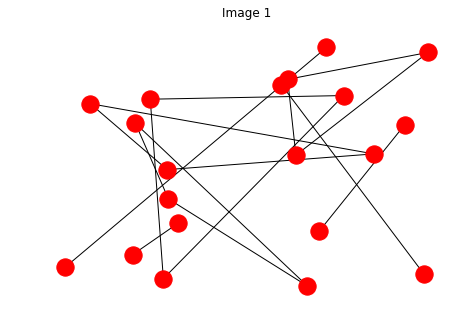

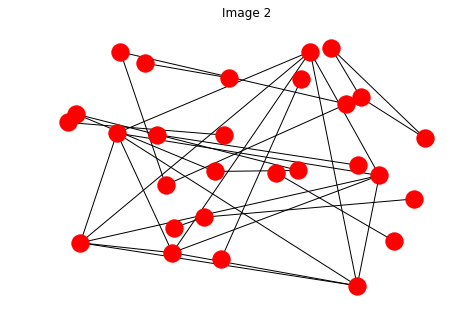

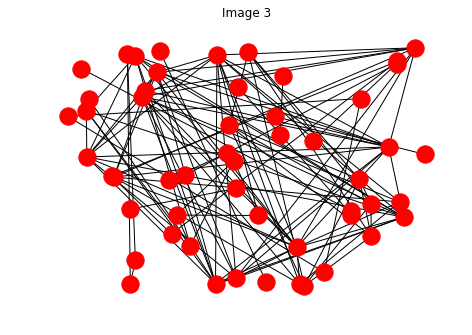

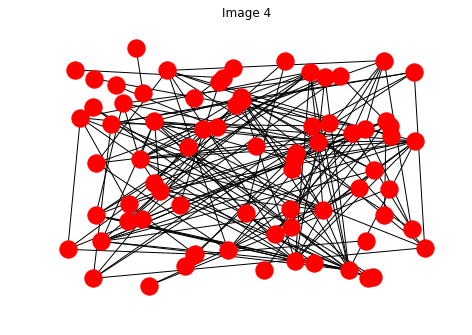

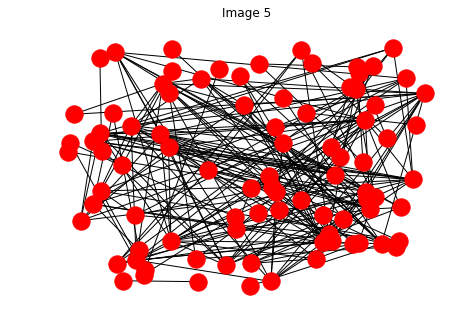

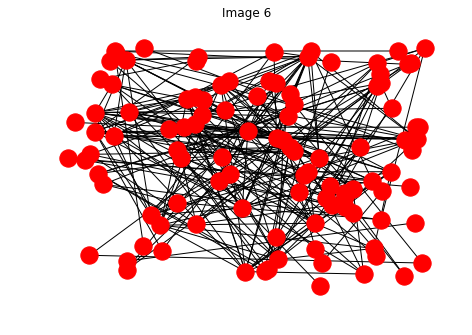

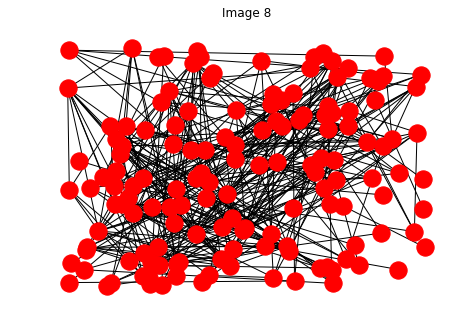

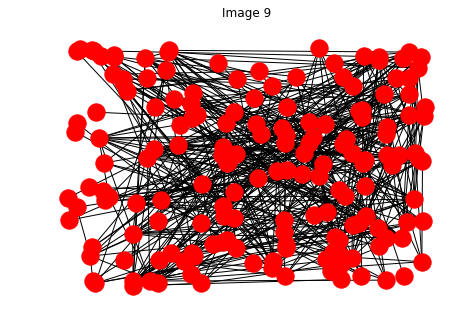

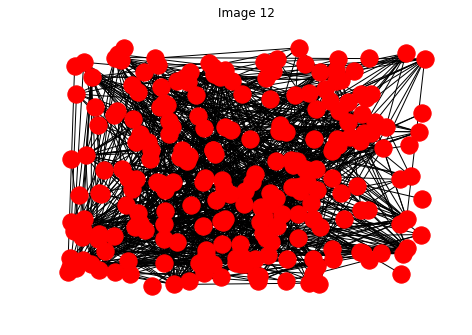

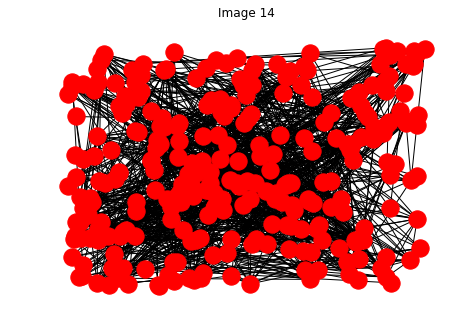

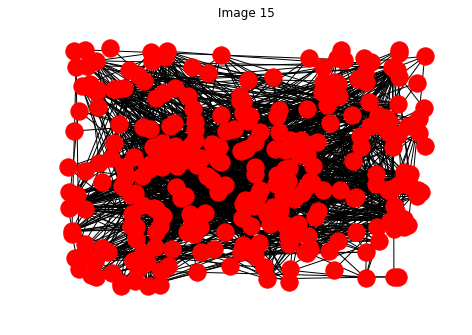

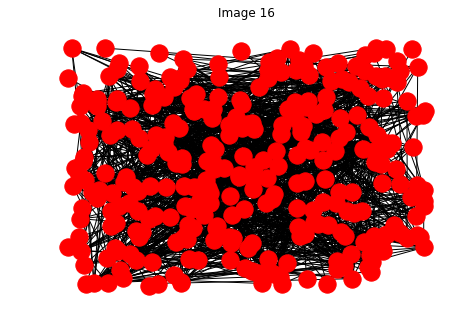

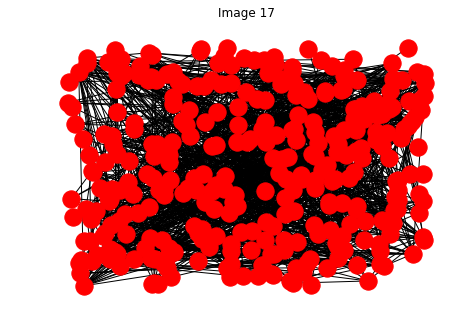

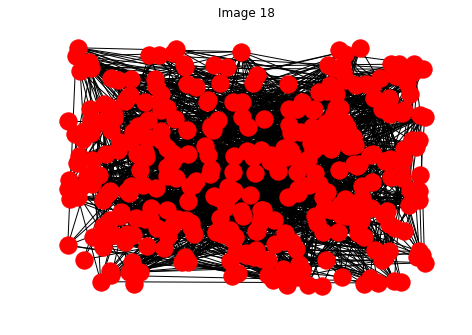

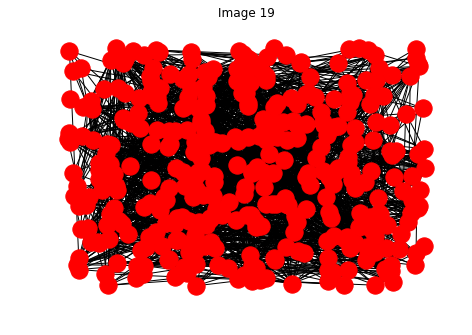

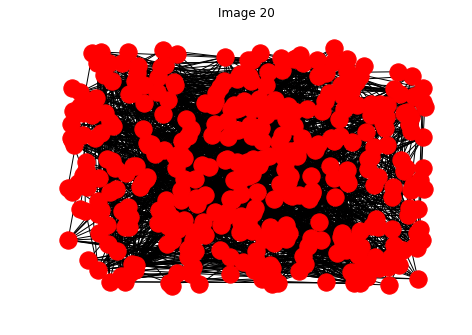

In [414]:
l1 = np.array(l1).reshape((len(l1), 4))
for k in range(1,21): 
    for i in range(k*25):
        for j in range(i+1,k*25):
            if((l1[j][3] - l1[i][3]) < mean_ts):
                isInfected_1[i] = 1
                break
    adj = [[0 for j in range(500)] for i in range(500)]
    G = nx.Graph()
    for i in range(k*25):
        for j in range(i+1,k*25):
            if(Similarity_1[i][j]>=mean_similarity and isInfected_1[i]==1):
                adj[i][j] = 1
                G.add_edge(i, j)
    Sus=k*25
    Inf=0
    for i in range(k*25):
        for j in range(i+1,k*25):
            if(adj[i][j]==1):
                Sus-=1
                break
    Inf=k*25-Sus
    ans1.append((Sus,Inf))
    nx.draw_random(G)
    plt.title('Image '+str(k))
    plt.show()

/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


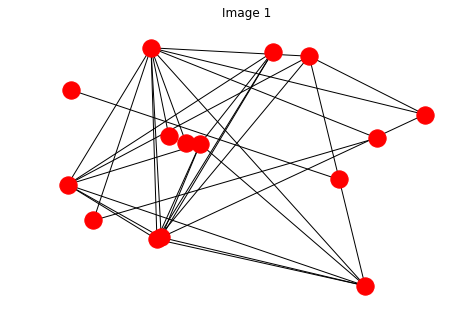

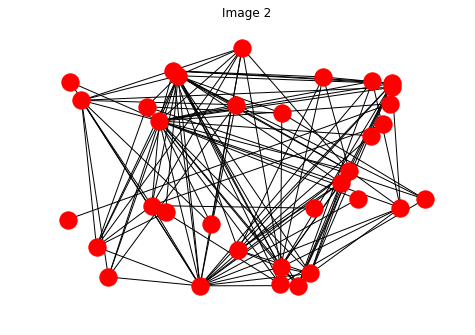

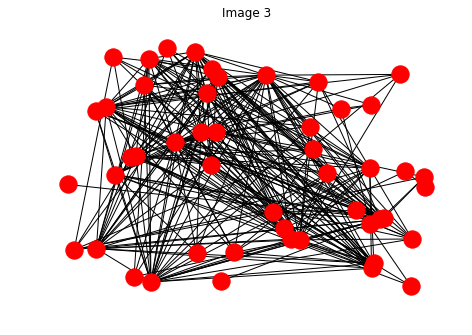

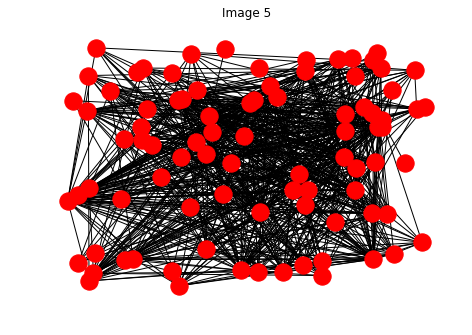

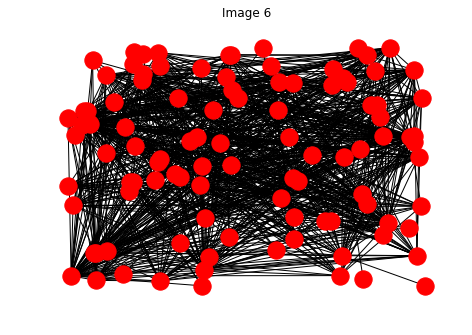

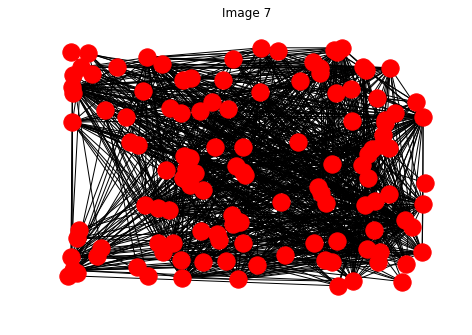

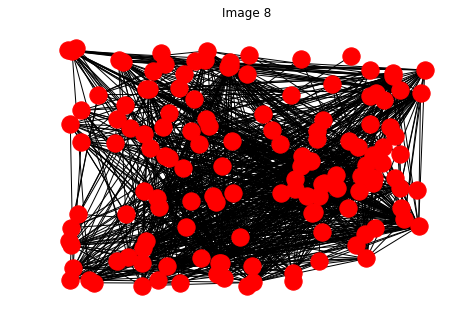

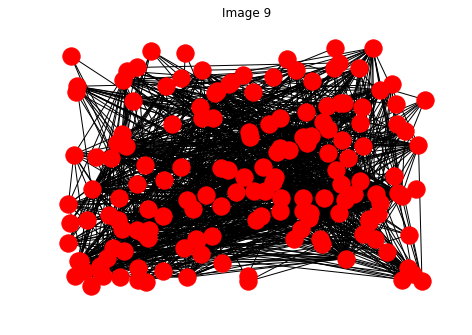

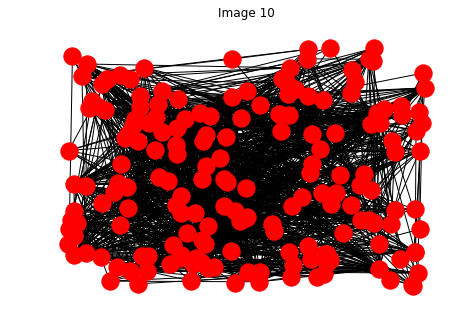

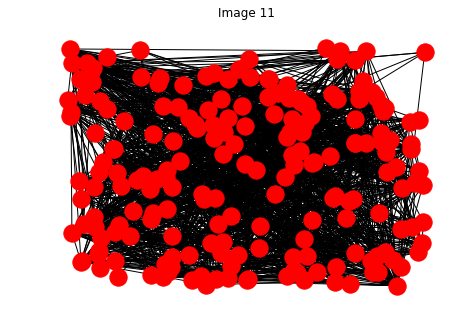

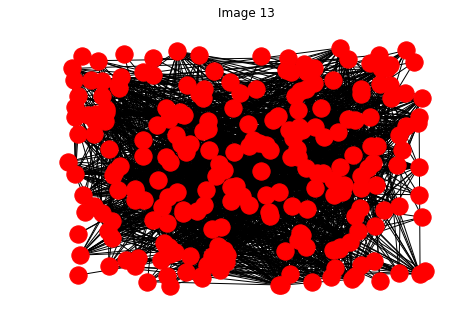

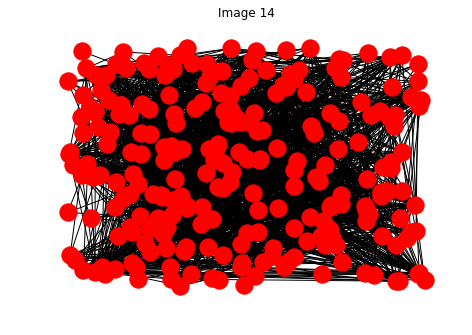

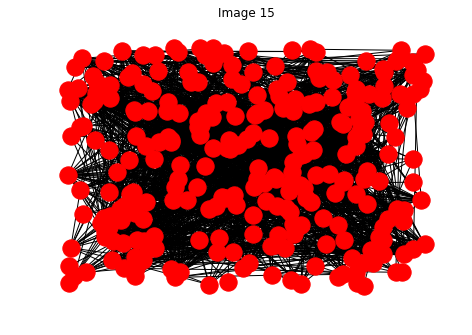

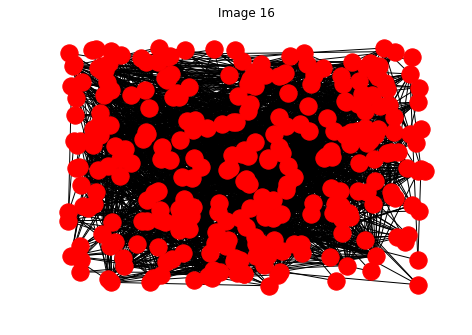

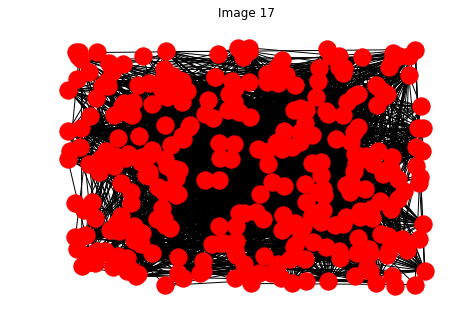

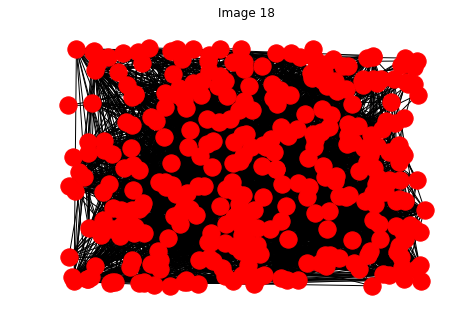

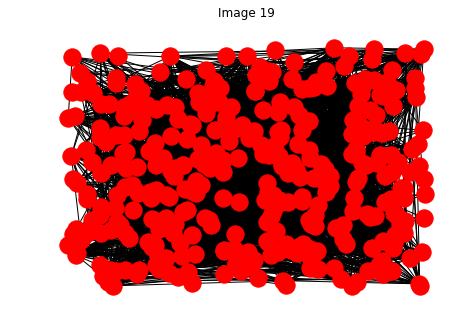

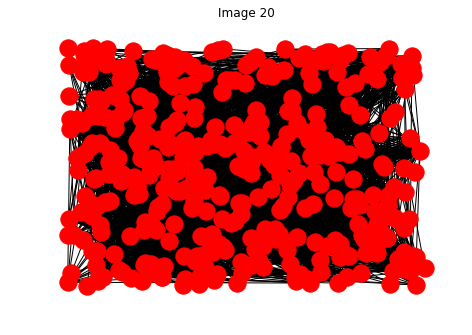

In [415]:
l2 = np.array(l2).reshape((len(l2), 4))
for k in range(1,21): 
    for i in range(k*25):
        for j in range(i+1,k*25):
            if((l2[j][3] - l2[i][3]) < mean_ts):
                isInfected_2[i] = 1
                break
    adj = [[0 for j in range(500)] for i in range(500)]
    G = nx.Graph()
    for i in range(k*25):
        for j in range(i+1,k*25):
            if(Similarity_2[i][j]>=mean_similarity and isInfected_2[i]==1):
                adj[i][j] = 1
                G.add_edge(i, j)
    Sus=k*25
    Inf=0
    for i in range(k*25):
        for j in range(i+1,k*25):
            if(adj[i][j]==1):
                Sus-=1
                break
    Inf=k*25-Sus
    ans2.append((Sus,Inf))
    nx.draw_random(G)
    plt.title('Image '+str(k))
    plt.show()

/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


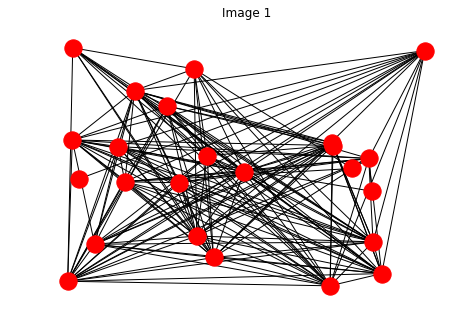

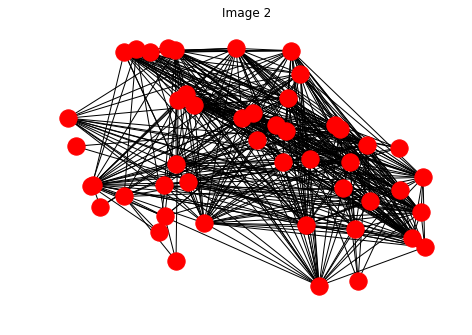

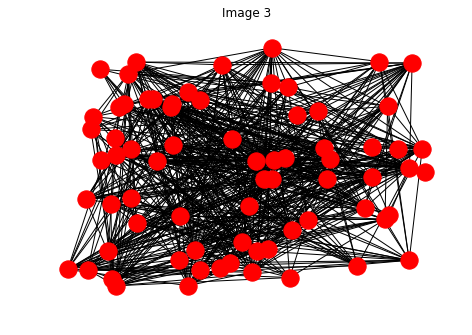

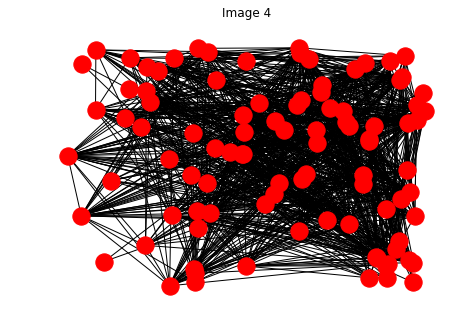

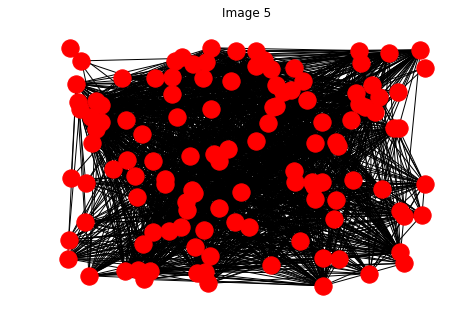

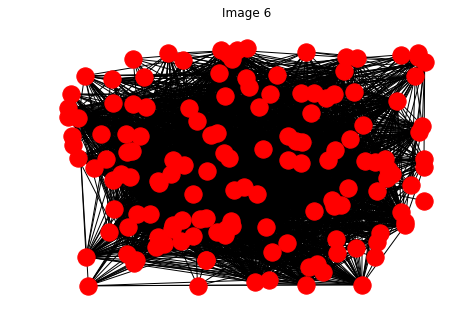

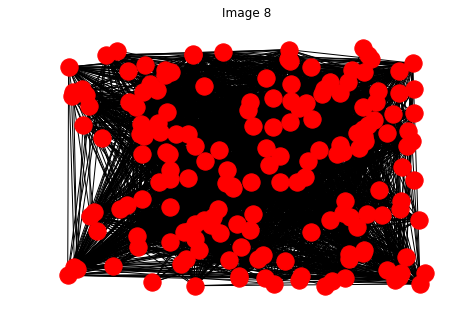

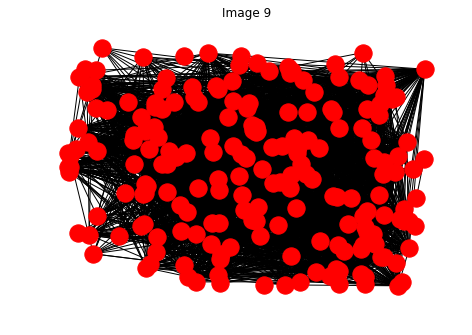

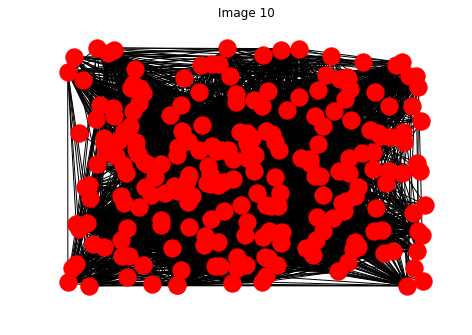

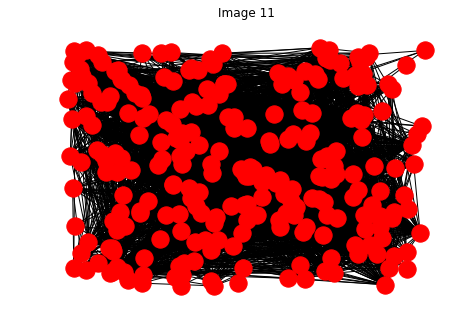

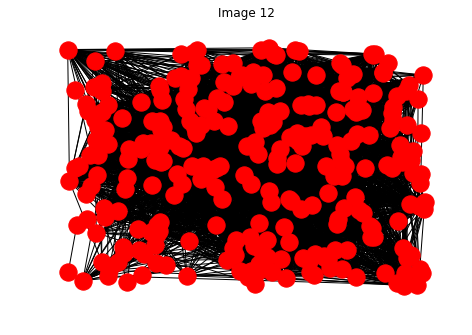

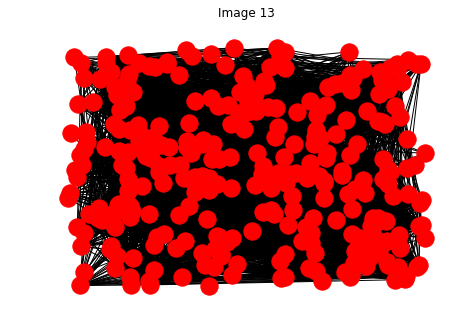

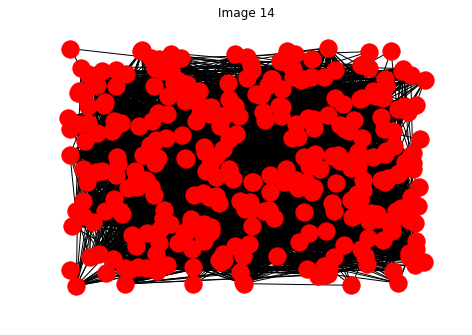

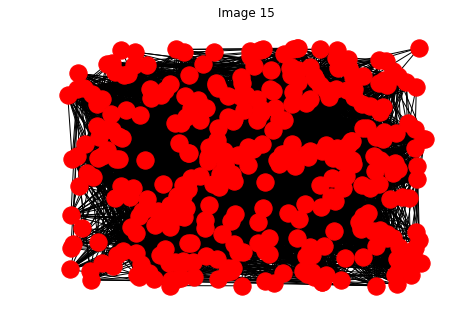

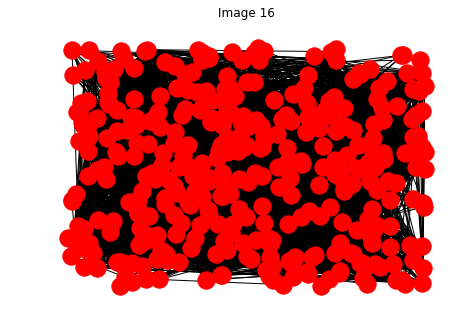

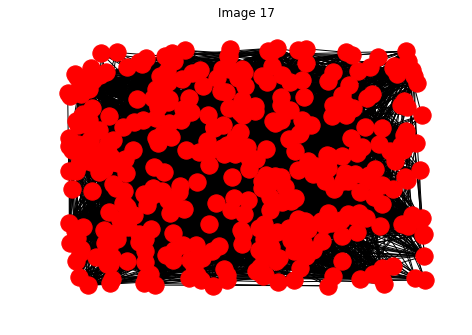

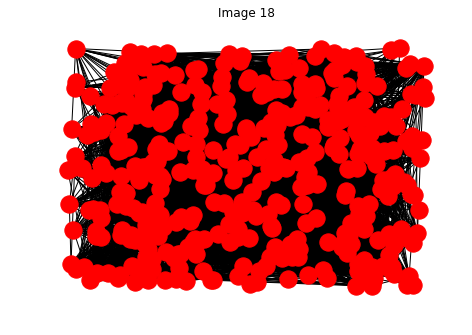

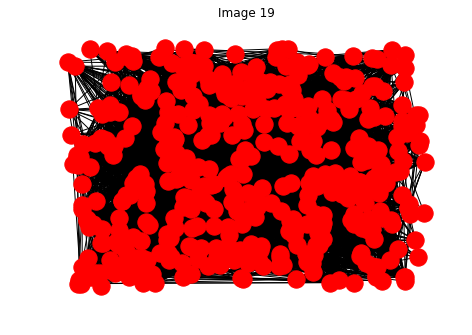

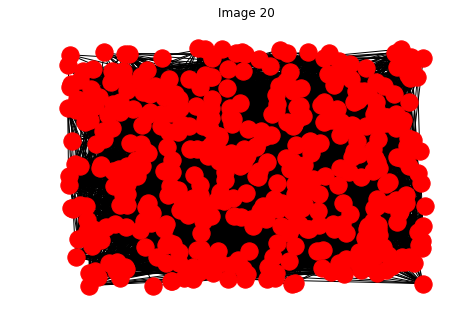

In [416]:
l3 = np.array(l3).reshape((len(l3), 4))
for k in range(1,21): 
    for i in range(k*25):
        for j in range(i+1,k*25):
            if((l3[j][3] - l3[i][3]) < mean_ts):
                isInfected_3[i] = 1
                break
    adj = [[0 for j in range(500)] for i in range(500)]
    G = nx.Graph()
    for i in range(k*25):
        for j in range(i+1,k*25):
            if(Similarity_3[i][j]>=mean_similarity and isInfected_3[i]==1):
                adj[i][j] = 1
                G.add_edge(i, j)
    Sus=k*25
    Inf=0
    for i in range(k*25):
        for j in range(i+1,k*25):
            if(adj[i][j]==1):
                Sus-=1
                break
    Inf=k*25-Sus
    ans3.append((Sus,Inf))
    nx.draw_random(G)
    plt.title('Image '+str(k))
    plt.show()

/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


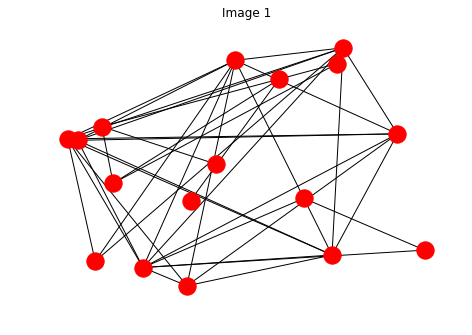

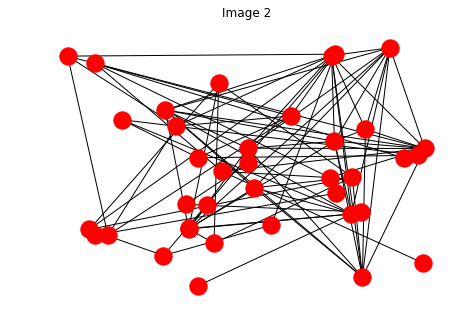

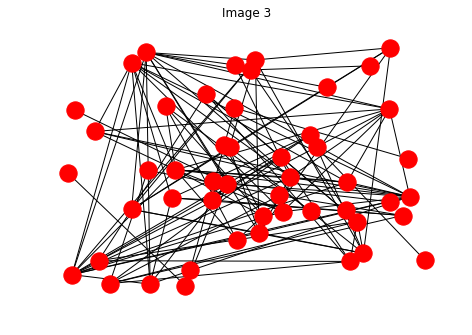

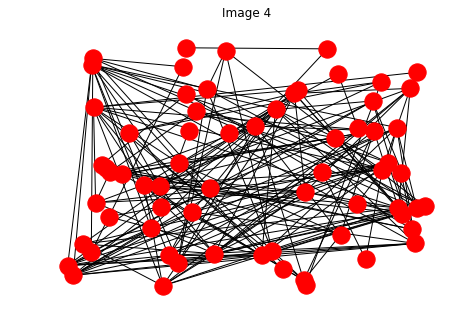

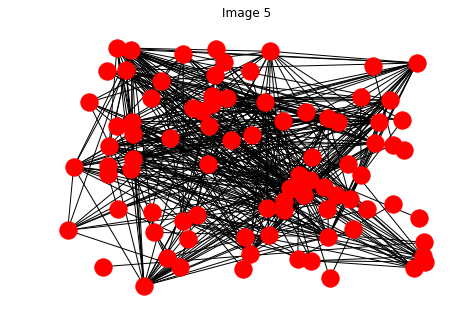

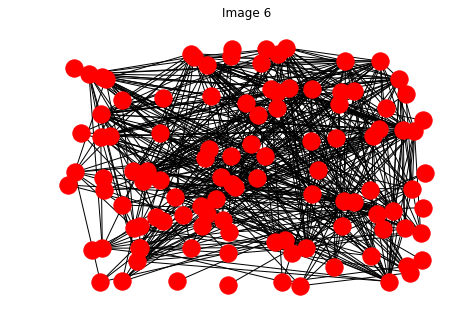

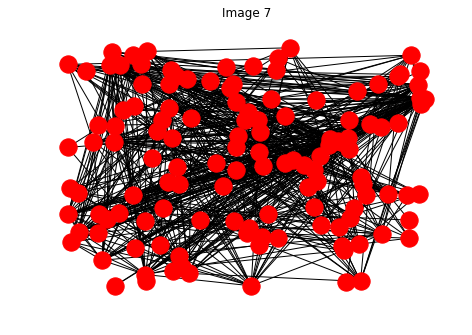

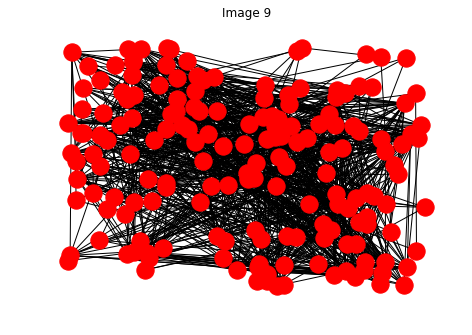

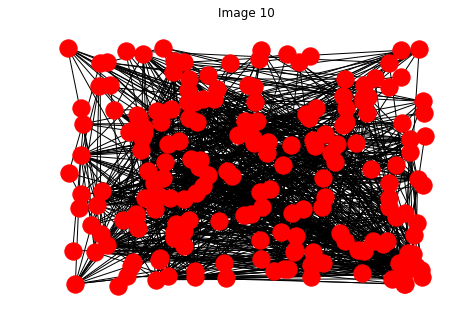

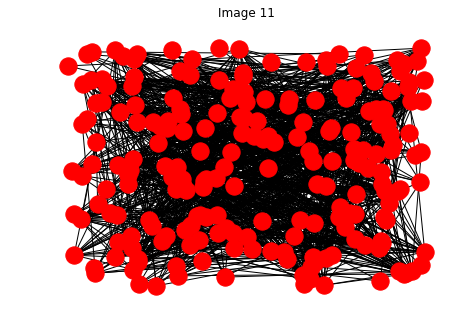

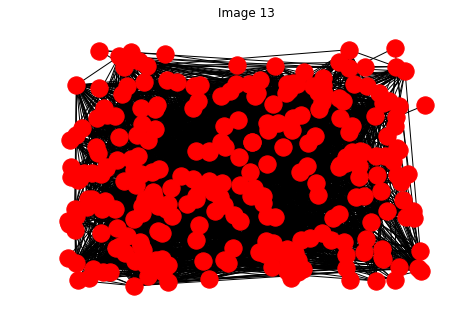

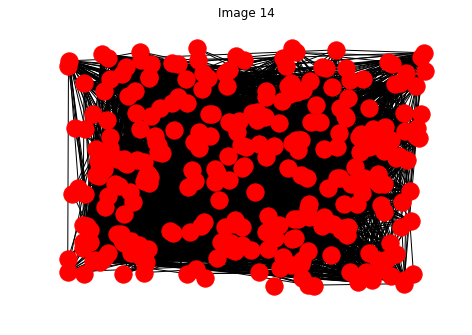

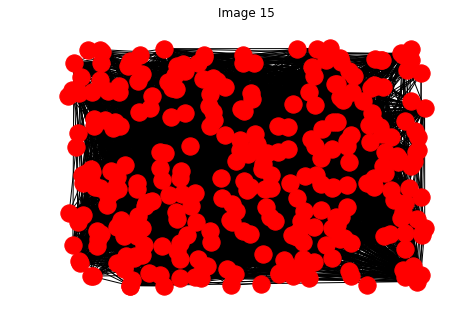

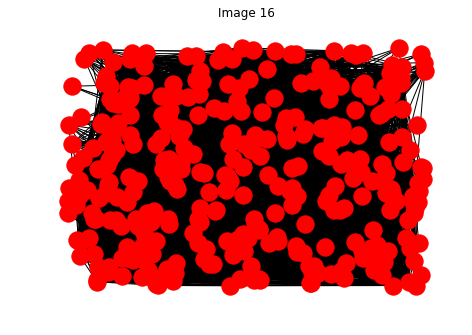

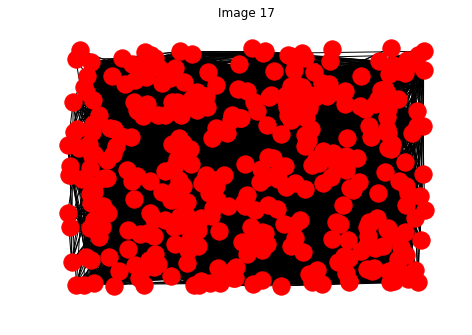

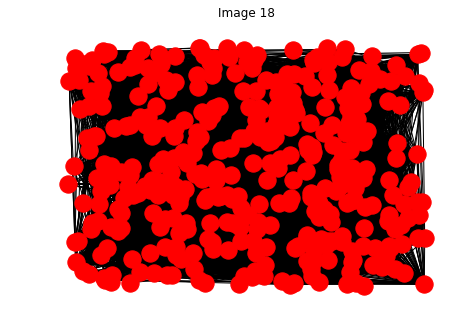

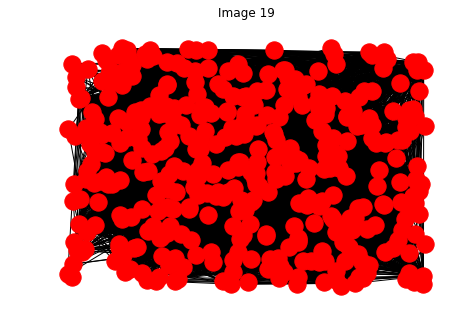

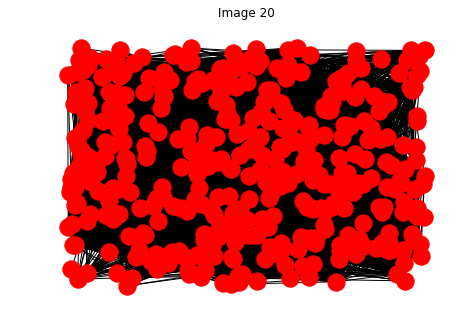

In [417]:
l4 = np.array(l4).reshape((len(l4), 4))
for k in range(1,21): 
    for i in range(k*25):
        for j in range(i+1,k*25):
            if((l4[j][3] - l4[i][3]) < mean_ts):
                isInfected_4[i] = 1
                break
    adj = [[0 for j in range(500)] for i in range(500)]
    G = nx.Graph()
    for i in range(k*25):
        for j in range(i+1,k*25):
            if(Similarity_4[i][j]>=mean_similarity and isInfected_4[i]==1):
                adj[i][j] = 1
                G.add_edge(i, j)
    Sus=k*25
    Inf=0
    for i in range(k*25):
        for j in range(i+1,k*25):
            if(adj[i][j]==1):
                Sus-=1
                break
    Inf=k*25-Sus
    ans4.append((Sus,Inf))
    nx.draw_random(G)
    plt.title('Image '+str(k))
    plt.show()

In [329]:
ans1

[(24, 1),
 (19, 6),
 (33, 17),
 (38, 37),
 (48, 52),
 (64, 61),
 (76, 74),
 (89, 86),
 (96, 104),
 (102, 123),
 (108, 142),
 (113, 162),
 (115, 185),
 (131, 194),
 (133, 217),
 (148, 227),
 (154, 246),
 (169, 256),
 (173, 277),
 (181, 294),
 (191, 309)]

In [330]:
ans2

[(24, 1),
 (14, 11),
 (23, 27),
 (31, 44),
 (42, 58),
 (50, 75),
 (62, 88),
 (70, 105),
 (85, 115),
 (92, 133),
 (97, 153),
 (106, 169),
 (118, 182),
 (126, 199),
 (141, 209),
 (151, 224),
 (153, 247),
 (155, 270),
 (157, 293),
 (162, 313),
 (166, 334)]

In [331]:
ans3

[(24, 1),
 (3, 22),
 (8, 42),
 (12, 63),
 (13, 87),
 (16, 109),
 (16, 134),
 (33, 142),
 (44, 156),
 (45, 180),
 (49, 201),
 (52, 223),
 (56, 244),
 (61, 264),
 (68, 282),
 (76, 299),
 (68, 332),
 (78, 347),
 (83, 367),
 (86, 389),
 (80, 420)]

In [332]:
ans4

[(24, 1),
 (12, 13),
 (22, 28),
 (41, 34),
 (53, 47),
 (58, 67),
 (70, 80),
 (74, 101),
 (74, 126),
 (86, 139),
 (95, 155),
 (97, 178),
 (98, 202),
 (98, 227),
 (101, 249),
 (99, 276),
 (98, 302),
 (102, 323),
 (114, 336),
 (128, 347),
 (143, 357)]

In [359]:
Susceptible_1 = []
Infectious_1 = []
for i in range(0,21):
    if (i==0):
        Susceptible_1.append(((ans1[0][0])/(25))*100)
        Infectious_1.append((ans1[0][1]/(25))*100)
    else:
        Susceptible_1.append(((ans1[i][0])/(25*i))*100)
        Infectious_1.append((ans1[i][1]/(25*i))*100)

In [360]:
Susceptible_2 = []
Infectious_2 = []
for i in range(0,21):
    if (i==0):
        Susceptible_2.append(((ans2[0][0])/(25))*100)
        Infectious_2.append((ans2[0][1]/(25))*100)
    else:
        Susceptible_2.append(((ans2[i][0])/(25*i))*100)
        Infectious_2.append((ans2[i][1]/(25*i))*100)

In [361]:
Susceptible_3 = []
Infectious_3 = []
for i in range(0,21):
    if (i==0):
        Susceptible_3.append(((ans3[0][0])/(25))*100)
        Infectious_3.append((ans3[0][1]/(25))*100)
    else:
        Susceptible_3.append(((ans3[i][0])/(25*i))*100)
        Infectious_3.append((ans3[i][1]/(25*i))*100)

In [362]:
Susceptible_4 = []
Infectious_4 = []
for i in range(0,21):
    if (i==0):
        Susceptible_4.append(((ans4[0][0])/(25))*100)
        Infectious_4.append(ans4[0][1]/(25))
    else:
        Susceptible_4.append(((ans4[i][0])/(25*i))*100)
        Infectious_4.append((ans4[i][1]/(25*i))*100)

In [363]:
print(Susceptible_1)
print ('\n')
print(Infectious_1)

[96.0, 76.0, 66.0, 50.66666666666667, 48.0, 51.2, 50.66666666666667, 50.857142857142854, 48.0, 45.33333333333333, 43.2, 41.090909090909086, 38.333333333333336, 40.30769230769231, 38.0, 39.46666666666667, 38.5, 39.76470588235294, 38.44444444444444, 38.10526315789474, 38.2]


[4.0, 24.0, 34.0, 49.333333333333336, 52.0, 48.8, 49.333333333333336, 49.142857142857146, 52.0, 54.666666666666664, 56.8, 58.909090909090914, 61.66666666666667, 59.692307692307686, 62.0, 60.53333333333333, 61.5, 60.23529411764705, 61.55555555555555, 61.89473684210526, 61.8]


In [364]:
print(Susceptible_2)
print('\n')
print(Infectious_2)

[96.0, 56.00000000000001, 46.0, 41.333333333333336, 42.0, 40.0, 41.333333333333336, 40.0, 42.5, 40.88888888888889, 38.800000000000004, 38.54545454545455, 39.33333333333333, 38.76923076923077, 40.285714285714285, 40.266666666666666, 38.25, 36.470588235294116, 34.88888888888889, 34.10526315789474, 33.2]


[4.0, 44.0, 54.0, 58.666666666666664, 57.99999999999999, 60.0, 58.666666666666664, 60.0, 57.49999999999999, 59.111111111111114, 61.199999999999996, 61.45454545454545, 60.66666666666667, 61.23076923076923, 59.71428571428572, 59.73333333333334, 61.75000000000001, 63.52941176470588, 65.11111111111111, 65.89473684210526, 66.8]


In [365]:
print(Susceptible_3)
print('\n')
print(Infectious_3)

[96.0, 12.0, 16.0, 16.0, 13.0, 12.8, 10.666666666666668, 18.857142857142858, 22.0, 20.0, 19.6, 18.90909090909091, 18.666666666666668, 18.76923076923077, 19.428571428571427, 20.266666666666666, 17.0, 18.352941176470587, 18.444444444444443, 18.10526315789474, 16.0]


[4.0, 88.0, 84.0, 84.0, 87.0, 87.2, 89.33333333333333, 81.14285714285714, 78.0, 80.0, 80.4, 81.0909090909091, 81.33333333333333, 81.23076923076923, 80.57142857142857, 79.73333333333333, 83.0, 81.64705882352942, 81.55555555555556, 81.89473684210526, 84.0]


In [366]:
print(Susceptible_4)
print('\n')
print(Infectious_4)

[96.0, 48.0, 44.0, 54.666666666666664, 53.0, 46.400000000000006, 46.666666666666664, 42.285714285714285, 37.0, 38.22222222222222, 38.0, 35.27272727272727, 32.666666666666664, 30.153846153846153, 28.857142857142858, 26.400000000000002, 24.5, 24.0, 25.333333333333336, 26.94736842105263, 28.599999999999998]


[0.04, 52.0, 56.00000000000001, 45.33333333333333, 47.0, 53.6, 53.333333333333336, 57.714285714285715, 63.0, 61.77777777777778, 62.0, 64.72727272727272, 67.33333333333333, 69.84615384615384, 71.14285714285714, 73.6, 75.5, 76.0, 74.66666666666667, 73.05263157894737, 71.39999999999999]


In [367]:
Time_line = np.arange(1, 22, 1)
Time_line

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

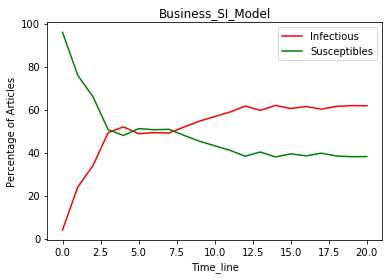

In [401]:
pl.plot(Infectious_1, '-r', label='Infectious')  
pl.plot(Susceptible_1, '-g', label='Susceptibles')
pl.legend(loc=0)
pl.xlabel('Time_line')
pl.ylabel('Percentage of Articles')
pl.title('Business_SI_Model')
plt.show()

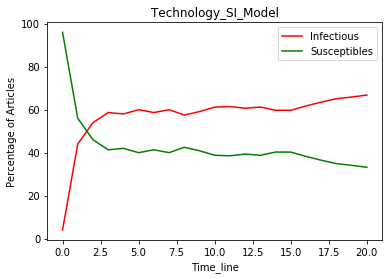

In [402]:
pl.plot(Infectious_2, '-r', label='Infectious')  
pl.plot(Susceptible_2, '-g', label='Susceptibles')
pl.legend(loc=0)
pl.xlabel('Time_line')
pl.ylabel('Percentage of Articles')
pl.title('Technology_SI_Model')
plt.show()

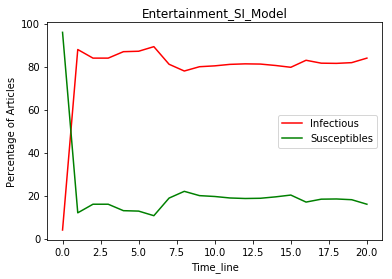

In [403]:
pl.plot(Infectious_3, '-r', label='Infectious')  
pl.plot(Susceptible_3, '-g', label='Susceptibles')
pl.legend(loc=0)
pl.xlabel('Time_line')
pl.ylabel('Percentage of Articles')
pl.title('Entertainment_SI_Model')
plt.show()

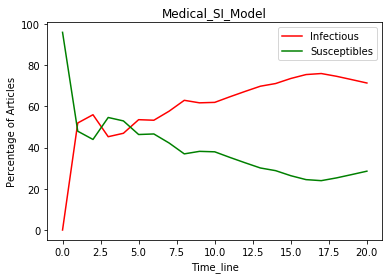

In [404]:
pl.plot(Infectious_4, '-r', label='Infectious')  
pl.plot(Susceptible_4, '-g', label='Susceptibles')
pl.legend(loc=0)
pl.xlabel('Time_line')
pl.ylabel('Percentage of Articles')
pl.title('Medical_SI_Model')
plt.show()

In [373]:
new_arr = []
def diff_eqs(INP,t):  
    '''''The main set of equations'''  
    Y=np.zeros((2))  
    V = INP  
    Y[0] = - beta * V[0] * V[1]  
    Y[1] = beta * V[0] * V[1]
    new_arr.append((Y[0], Y[1]))
    # Y[2] = gamma * V[1]  
    return Y   # For odeint 

In [374]:
beta=0.003
# gamma=0.1  
TS=1.0  
ND=50.0  
INPUT = (499, 1)

In [375]:
t_start = 0.0; t_end = ND; t_inc = TS  
t_range = np.arange(t_start, t_end+t_inc, t_inc)  
RES = spi.odeint(diff_eqs,INPUT,t_range)

In [376]:
pl.subplot(111)  
pl.plot(RES[:,1], '-r', label='Infectious')  
pl.plot(RES[:,0], '-g', label='Susceptibles')

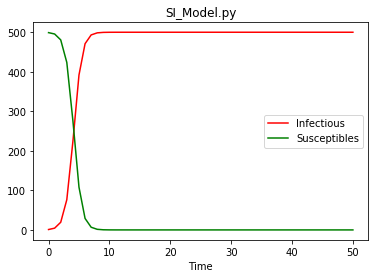

In [377]:
# pl.plot(RES[:,2], '-k', label='Recovereds')  
pl.legend(loc=0)  
pl.title('SI_Model.py')  
pl.xlabel('Time')  
# pl.ylabel('Infectious Susceptibles and Recovereds')  
pl.xlabel('Time')  
pl.show()

In [384]:
len(Infectious_1)

21

In [418]:
Business_Infectious_rate = []
Business_Susceptible_rate = []
for i in range(0,20):
    Business_Infectious_rate.append(Infectious_1[i+1]-Infectious_1[i])
    Business_Susceptible_rate.append(Susceptible_1[i+1]-Susceptible_1[i])

In [419]:
Technology_Infectious_rate = []
Technology_Susceptible_rate = []
for i in range(0,20):
    Technology_Infectious_rate.append(Infectious_2[i+1]-Infectious_2[i])
    Technology_Susceptible_rate.append(Susceptible_2[i+1]-Susceptible_2[i])

In [420]:
Entertainment_Infectious_rate = []
Entertainment_Susceptible_rate = []
for i in range(0,20):
    Entertainment_Infectious_rate.append(Infectious_3[i+1]-Infectious_3[i])
    Entertainment_Susceptible_rate.append(Susceptible_3[i+1]-Susceptible_3[i])

In [421]:
Medical_Infectious_rate = []
Medical_Susceptible_rate = []
for i in range(0,20):
    Medical_Infectious_rate.append(Infectious_4[i+1]-Infectious_4[i])
    Medical_Susceptible_rate.append(Susceptible_4[i+1]-Susceptible_4[i])

In [422]:
Time_line_2 = np.arange(1, 21, 1)
Time_line_2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

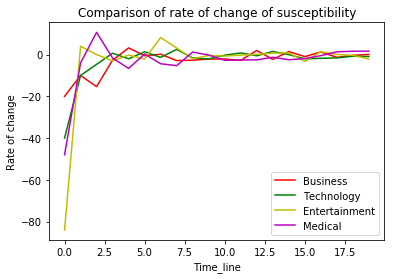

In [427]:
pl.plot(Business_Susceptible_rate, '-r', label='Business')  
pl.plot(Technology_Susceptible_rate, '-g', label='Technology')
pl.plot(Entertainment_Susceptible_rate, '-y', label='Entertainment')  
pl.plot(Medical_Susceptible_rate, '-m', label='Medical')
pl.legend(loc=0)
pl.xlabel('Time_line')
pl.ylabel('Rate of change')
pl.title('Comparison of rate of change of susceptibility')
plt.show()

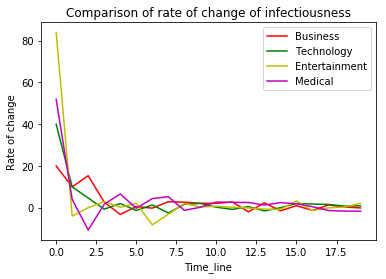

In [428]:
pl.plot(Business_Infectious_rate, '-r', label='Business')  
pl.plot(Technology_Infectious_rate, '-g', label='Technology')
pl.plot(Entertainment_Infectious_rate, '-y', label='Entertainment')  
pl.plot(Medical_Infectious_rate, '-m', label='Medical')
pl.legend(loc=0)
pl.xlabel('Time_line')
pl.ylabel('Rate of change')
pl.title('Comparison of rate of change of infectiousness')
plt.show()